STEP 1: LOADING THE DATASET

In [8]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("C:/Users/HP/OneDrive/Documents/ML CAT 2/pldataset.csv")

# Displaying the first few rows and check the shape of the DataFrame
print(df.head())
print("Shape of the dataset:", df.shape)

  Div        Date   Time        HomeTeam     AwayTeam  FTHG  FTAG FTR  HTHG  \
0  E0  12/09/2020  12:30          Fulham      Arsenal     0     3   A     0   
1  E0  12/09/2020  15:00  Crystal Palace  Southampton     1     0   H     1   
2  E0  12/09/2020  17:30       Liverpool        Leeds     4     3   H     3   
3  E0  12/09/2020  20:00        West Ham    Newcastle     0     2   A     0   
4  E0  13/09/2020  14:00       West Brom    Leicester     0     3   A     0   

   HTAG  ... AvgC<2.5  AHCh  B365CAHH  B365CAHA  PCAHH  PCAHA  MaxCAHH  \
0     1  ...     1.84  0.75      2.01      1.89   2.02   1.91     2.13   
1     0  ...     1.70  0.25      1.78      2.13   1.79   2.17     1.85   
2     2  ...     2.62 -1.50      1.85      2.05   1.85   2.08     1.90   
3     0  ...     1.92 -0.50      2.03      1.87   2.04   1.88     2.09   
4     0  ...     1.73  0.25      1.92      1.98   1.93   1.99     1.95   

   MaxCAHA  AvgCAHH  AvgCAHA  
0     1.92     2.02     1.87  
1     2.18     1.7

STEP 2: DATA PREPROCESSING

2.1: Checking for Missing Values and Data Types

In [9]:
# Checking for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Checking data types of each column
print("Data types of each column:")
print(df.dtypes)

Missing values in each column:
Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64
Data types of each column:
Div          object
Date         object
Time         object
HomeTeam     object
AwayTeam     object
             ...   
PCAHA       float64
MaxCAHH     float64
MaxCAHA     float64
AvgCAHH     float64
AvgCAHA     float64
Length: 106, dtype: object


2.2: Cleaning Column Names

In [10]:
# Stripping whitespace from column names
df.columns = df.columns.str.strip()

2.3: Converting Relevant Columns to Numeric

In [11]:
# Listing of relevant numeric columns based on my understanding of the dataset
numeric_columns = [
    'FTHG', 'FTAG', 'HTHG', 'HTAG', 'HS', 'AS', 
    'HST', 'AST', 'HF', 'AF', 'HC', 'AC', 
    'HY', 'AY', 'HR', 'AR'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

2.4: Handling Missing Values

In [12]:
# Dropping rows with missing target values (FTR - Full Time Result)
df.dropna(subset=['FTR'], inplace=True)

# Filling missing values in numeric columns with median
for col in numeric_columns:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

Step 3: Feature Engineering

3.1: Creating New Features

In [13]:
# Creating goal difference feature
df['goal_difference'] = df['FTHG'] - df['FTAG']

3.2: One-Hot Encode Team Names

In [14]:
# One-hot encode team names (HomeTeam and AwayTeam)
df = pd.get_dummies(df, columns=['HomeTeam', 'AwayTeam'], drop_first=True)

Step 4: Verifying Changes

In [15]:
# Displaying the updated DataFrame with new features
print("Updated DataFrame:")
print(df.head())
print("Columns after one-hot encoding:")
print(df.columns.tolist())

Updated DataFrame:
  Div        Date   Time  FTHG  FTAG FTR  HTHG  HTAG HTR     Referee  ...  \
0  E0  12/09/2020  12:30     0     3   A     0     1   A  C Kavanagh  ...   
1  E0  12/09/2020  15:00     1     0   H     1     0   H      J Moss  ...   
2  E0  12/09/2020  17:30     4     3   H     3     2   H    M Oliver  ...   
3  E0  12/09/2020  20:00     0     2   A     0     0   D   S Attwell  ...   
4  E0  13/09/2020  14:00     0     3   A     0     0   D    A Taylor  ...   

   AwayTeam_Liverpool  AwayTeam_Man City  AwayTeam_Man United  \
0               False              False                False   
1               False              False                False   
2               False              False                False   
3               False              False                False   
4               False              False                False   

   AwayTeam_Newcastle  AwayTeam_Sheffield United  AwayTeam_Southampton  \
0               False                      False     

By following these steps, I have successfully loaded my dataset, preprocessed it by handling missing values, converted columns to appropriate types, created new features, and performed one-hot encoding for categorical variables. 

Step 5: Preparing Data for Modeling

5.1: Defining Features and Target Variable

In [16]:
# Defining features and target variable
X = df.drop(columns=['FTR'])  # Features
y = df['FTR']  # Target variable

5.2: Splitting the Data into Training and Testing Sets

In [17]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

TRAINING MY MODEL

In [18]:
from sklearn.ensemble import RandomForestClassifier

# Initializing the Random Forest Classifier
model = RandomForestClassifier(random_state=42)

# Fitting the model on the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'E0'

FIXING 'E0' ERROR

In [20]:
import pandas as pd

# Loading the dataset
df = pd.read_csv("C:/Users/HP/OneDrive/Documents/ML CAT 2/pldataset.csv")

# Checking for unique values in all columns to identify where 'E0' appears
for col in df.columns:
    unique_values = df[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'Div': ['E0']
Unique values in 'Date': ['12/09/2020' '13/09/2020' '14/09/2020' '19/09/2020' '20/09/2020'
 '21/09/2020' '26/09/2020' '27/09/2020' '28/09/2020' '03/10/2020'
 '04/10/2020' '17/10/2020' '18/10/2020' '19/10/2020' '23/10/2020'
 '24/10/2020' '25/10/2020' '26/10/2020' '30/10/2020' '31/10/2020'
 '01/11/2020' '02/11/2020' '06/11/2020' '07/11/2020' '08/11/2020'
 '21/11/2020' '22/11/2020' '23/11/2020' '27/11/2020' '28/11/2020'
 '29/11/2020' '30/11/2020' '05/12/2020' '06/12/2020' '07/12/2020'
 '11/12/2020' '12/12/2020' '13/12/2020' '15/12/2020' '16/12/2020'
 '17/12/2020' '19/12/2020' '20/12/2020' '21/12/2020' '26/12/2020'
 '27/12/2020' '28/12/2020' '29/12/2020' '30/12/2020' '01/01/2021'
 '02/01/2021' '03/01/2021' '04/01/2021' '12/01/2021' '13/01/2021'
 '14/01/2021' '16/01/2021' '17/01/2021' '18/01/2021' '19/01/2021'
 '20/01/2021' '21/01/2021' '23/01/2021' '26/01/2021' '27/01/2021'
 '28/01/2021' '30/01/2021' '31/01/2021' '02/02/2021' '03/02/2021'
 '04/02/2021' '06/02

In [21]:
# Checking specific columns that are expected to be numeric
numeric_columns = ['FTHG', 'FTAG', 'HS', 'AS', 'HST', 'AST', 
                   'HF', 'AF', 'HC', 'AC', 'HY', 'AY']

for col in numeric_columns:
    print(f"Unique values in '{col}': {df[col].unique()}")

Unique values in 'FTHG': [0 1 4 5 2 3 7 6 9]
Unique values in 'FTAG': [3 0 2 1 5 6 4 7]
Unique values in 'HS': [ 5 22 15  7  9 13 17 10 14  6 18  8 23 16 21 11 12  4  1 19 20 25 24 26
 27 28  3  2 29]
Unique values in 'AS': [13  9  6 15 10 11 14 18 16  4  7 22  5 17 12 23 28 20 27 19 21  8  3  2
  1 26]
Unique values in 'HST': [ 2  3  6  1  5  7  4  0 12  8 11 10  9 13 14]
Unique values in 'AST': [ 6  5  3  2  7  4  1  9 10  0  8 14 12]
Unique values in 'HF': [12 14  9 13 15  8 11 16 10  6 18  7 17 19  3  5 20 23 22  4 21]
Unique values in 'AF': [12 11  6  7  9 13 18 10 15  8 16  4 14 17  5 19  1 21  3  2 20]
Unique values in 'HC': [ 2  7  9  8  5  4 12 11  3  1 15 10  6  0 14 13 16]
Unique values in 'AC': [ 3  0  7  5  1  2 11  4  6  9 10  8 13 12]
Unique values in 'HY': [2 1 0 4 3 6 5]
Unique values in 'AY': [2 1 0 3 4 5]


In [22]:
# Converting relevant columns to numeric, coercing errors
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check for missing values after conversion
print("Missing values after conversion:")
print(df.isnull().sum())

Missing values after conversion:
Div         0
Date        0
Time        0
HomeTeam    0
AwayTeam    0
           ..
PCAHA       0
MaxCAHH     0
MaxCAHA     0
AvgCAHH     0
AvgCAHA     0
Length: 106, dtype: int64


In [23]:
# Dropping rows with missing target values (FTR - Full Time Result)
df.dropna(subset=['FTR'], inplace=True)

# Filling missing values in numeric columns with median
for col in numeric_columns:
    if df[col].isnull().any():
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)

In [24]:
# Defining features and target variable
y = df['FTR']  # Target variable (should only contain FTR)
X = df.drop(columns=['FTR'])  # Features (should not contain FTR)

# One-hot encode categorical variables if needed
X = pd.get_dummies(X, drop_first=True)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and fit the model again
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

MODEL EVALUATION


Accuracy: 0.72
Classification Report:
               precision    recall  f1-score   support

           A       0.74      0.88      0.80        32
           D       0.56      0.25      0.34        20
           H       0.76      0.92      0.83        24

    accuracy                           0.72        76
   macro avg       0.68      0.68      0.66        76
weighted avg       0.70      0.72      0.69        76



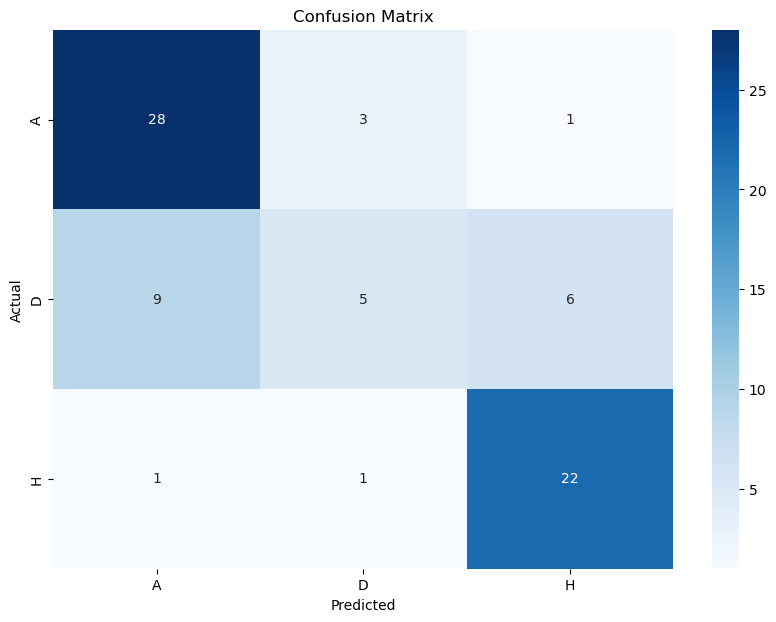

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generating a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Creating a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

HYPERPARAMETER TUNING

In [27]:
from sklearn.model_selection import GridSearchCV

# Defining parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Initializing GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Outputing the best parameters found
print("Best parameters from Grid Search:", grid_search.best_params_)

Best parameters from Grid Search: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


SAVING MY MODEL

In [32]:
import joblib

# Saving the trained model to a file
joblib.dump(model, 'premier_league_predictor.pkl')

['premier_league_predictor.pkl']

Make Predictions with New Data

In [29]:
# Example of making a prediction with new match data
new_match_data = {
    'HomeTeam': 'Chelsea',
    'AwayTeam': 'Arsenal',
    'HS': 15,
    'AS': 10,
    'HST': 7,
    'AST': 5,
    'HF': 12,
    'AF': 10,
    'HC': 6,
    'AC': 3,
    'HY': 2,
    'AY': 1,
}

# Convert new match data to DataFrame and preprocess as needed (e.g., one-hot encoding)
new_match_df = pd.DataFrame([new_match_data])
new_match_encoded = pd.get_dummies(new_match_df, drop_first=True)

# Align columns with training set by adding missing columns with default values of 0
for column in X.columns:
    if column not in new_match_encoded.columns:
        new_match_encoded[column] = 0
        
new_match_encoded = new_match_encoded[X.columns]  # Ensure order matches X

# Make prediction
prediction = model.predict(new_match_encoded)
print("Predicted outcome:", prediction[0])  # Outputs H (Home win), D (Draw), A (Away win)

Predicted outcome: H


C:\Users\HP\AppData\Local\Temp\ipykernel_4616\2818698038.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_match_encoded[column] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_4616\2818698038.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  new_match_encoded[column] = 0
C:\Users\HP\AppData\Local\Temp\ipykernel_4616\2818698038.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

CHANGING MY DIRECTORY TO CAPTURE MY PICKLE FILE

In [33]:
from sklearn.ensemble import RandomForestClassifier
import joblib

model = RandomForestClassifier(random_state=42)
# Fit your model on training data (X_train, y_train)
# model.fit(X_train, y_train)

# Save the trained model to a file in the desired directory
joblib.dump(model, r'C:\Users\HP\OneDrive\Documents\ML CAT 2\premier_league_predictor.pkl')

['C:\\Users\\HP\\OneDrive\\Documents\\ML CAT 2\\premier_league_predictor.pkl']